# Hypothesis: There is a weak positive correlation between a countries' primary school completion rate and government expenditures on education.

Data From [World Bank Open Data](https://data.worldbank.org/)

Indictators Used:
- SE.PRM.CMPT.ZS - Primary completion rate, total (% of relevant age group) 
    - dependent var
- SE.XPD.TOTL.GB.ZS - Government expenditure on education, total (% of government expenditure) 
    - independent var

In [79]:
import pandas as pd
PRI_ED_RATE: str = "SE.PRM.CMPT.ZS"
GOV_ED_BUDGET: str = "SE.XPD.TOTL.GB.ZS"

# Part 0: Turning the CSV file into a Dataframe

In [62]:
world_data = pd.read_csv("../../data/databank_education_2018.csv")

# Part 1: Shape and Head
## Step 1.0: This uses the "shape" attribute to find the number of rows and columns in the CSV or DataFrame. 
The first number printed is the number of rows, and the second number printed is the number of columns.

In [63]:
world_data.shape

(244, 94)

## Step 1.1: This uses the head method to print the first 10 rows of the DataFrame.

In [64]:
world_data.head(10)

,Country,SE.COM.DURS,SE.ENR.PRIM.FM.ZS,SE.ENR.PRSC.FM.ZS,SE.ENR.SECO.FM.ZS,SE.ENR.TERT.FM.ZS,SE.PRE.DURS,SE.PRE.ENRL.TC.ZS,SE.PRE.ENRR,SE.PRE.ENRR.FE,...,SH.DYN.1014,SH.DYN.1519,SH.DYN.2024,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.ZS,SP.POP.0014.TO.ZS,SP.POP.1564.TO.ZS
0,Afghanistan,9.0,0.66691,0.63602,0.57098,0.34523,1.0,NaN,NaN,NaN,...,2.000000,13.800000,17.600000,21.247021,10319282.0,13.920000,10.290000,11.060000,43.090176,54.324898
1,Albania,9.0,1.03765,1.01730,1.00539,1.36299,5.0,17.09409,80.498734,80.790977,...,1.100000,1.800000,1.900000,42.190687,1400072.0,11.870000,12.620000,12.300000,17.672874,68.582390
2,Algeria,10.0,0.95499,NaN,NaN,1.39722,1.0,NaN,NaN,NaN,...,1.700000,2.700000,3.300000,20.126974,12589369.0,20.490000,9.720000,11.890000,30.148679,63.488825
3,Andorra,10.0,NaN,NaN,NaN,NaN,3.0,13.27711,NaN,NaN,...,0.500000,1.400000,2.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,6.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,6.400000,13.100000,19.900000,50.202910,12705650.0,7.280000,6.720000,7.000000,46.808925,50.974702
5,Antigua and Barbuda,11.0,0.99208,0.97924,0.96286,NaN,5.0,NaN,70.253601,74.025070,...,1.000000,2.500000,3.200000,NaN,NaN,NaN,NaN,NaN,22.081092,69.119083
6,Arab World,9.0,0.94617,0.94833,0.95186,1.09935,3.0,21.16757,27.001801,26.855440,...,2.923226,6.268086,8.017785,20.368759,134761988.0,19.903642,7.788688,10.256798,32.780436,62.661687
7,Argentina,14.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,...,1.100000,3.500000,4.900000,43.001857,20551682.0,10.540000,8.230000,9.220000,24.760934,64.121277
8,Armenia,12.0,0.99961,1.02283,1.03762,1.24788,3.0,6.27090,38.021290,39.659691,...,1.000000,2.300000,2.700000,44.231575,1245626.0,20.400000,17.830000,18.969999,20.633422,68.112760
9,Aruba,13.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.802447,68.646606


# Part 2: Selecting Column Subsets
## Step 2.0: Selecting the 3 Necessary Columns: the Country name, Primary Education Rate, Government Education Budget.
Primary Education Rate = PRI_ED_RATE 

Government Education Budget = GOV_ED_BUDGET 

In [65]:
interested_columns = world_data[["Country", PRI_ED_RATE, GOV_ED_BUDGET]]

## Step 2.1: Using the head method to print the first 10 rows of the DataFrame.

In [66]:
interested_columns.head(10)

,Country,SE.PRM.CMPT.ZS,SE.XPD.TOTL.GB.ZS
0,Afghanistan,85.625328,NaN
1,Albania,101.537857,NaN
2,Algeria,105.143959,NaN
3,Andorra,NaN,19.323059
4,Angola,NaN,NaN
5,Antigua and Barbuda,96.198830,NaN
6,Arab World,84.952232,NaN
7,Argentina,NaN,NaN
8,Armenia,89.878960,NaN
9,Aruba,NaN,NaN


# Part 3: Selecting Rows with Complete Data
## Step 3.0: Using filtering to only get the countries that have both indictor data needed and excluding those countries that are missing either one of the indictors. 


In [67]:
complete__interest_data = interested_columns[(world_data[PRI_ED_RATE].notna()) & (world_data[GOV_ED_BUDGET].notna())]

## Step 3.1: Using the shape attribute of a DataFrame to observe how many countries have both of the data needed
The total countries in the DataFrame is 244, but after filtering the DataFrame to meet our requirements, the number of countries decreased to 49.

In [68]:
print(world_data.shape)
print(complete__interest_data.shape)

(244, 94)
(49, 3)


## Step 3.2: Using the head method to list out the first 10 rows of our data set. 
The new data set now includes all of the countries that has data for the primary education rate and the government education budget.

In [69]:
complete__interest_data.head(10)

,Country,SE.PRM.CMPT.ZS,SE.XPD.TOTL.GB.ZS
12,Azerbaijan,100.219948,7.435460
19,Belize,104.474480,21.365290
30,Burkina Faso,65.478928,22.661169
31,Burundi,63.021389,19.919870
33,Cambodia,87.999481,8.838980
34,Cameroon,64.470680,16.883160
36,Caribbean small states,90.818977,18.584000
42,Colombia,106.769386,15.982620
46,Costa Rica,98.594368,26.086670
47,Cote d'Ivoire,74.602577,18.331671


# Part 4: Sorting the data in descending order
This section will be sorting through the government education budget of the new data set, but this process is universal for any of the other indicators in the World Bank Open Data.
## Step 4.0: Using the sort_values method to sort the government education budget data in descending order.

In [70]:
dec_new_data = complete__interest_data.sort_values(by = GOV_ED_BUDGET, ascending=False)

## Step 4.1: Using the head method to print out the first 10 rows of the data in descending order.

In [71]:
dec_new_data.head(10)

,Country,SE.PRM.CMPT.ZS,SE.XPD.TOTL.GB.ZS
193,Sierra Leone,81.785339,32.473221
46,Costa Rica,98.594368,26.086670
84,Guatemala,79.690376,23.749540
30,Burkina Faso,65.478928,22.661169
221,Togo,89.672562,21.769091
19,Belize,104.474480,21.365290
218,Tanzania,68.703728,20.560011
31,Burundi,63.021389,19.919870
136,Madagascar,65.468773,19.818220
143,Mauritius,100.791184,19.647820


# Part 5: Making a Scatter Plot!
## Step 5.0: Using Pandas documentation to produce a scatter plot with titles, labels, and the data set

Text(0.5, 0, 'Government Education Budget (% of government expenditure)')

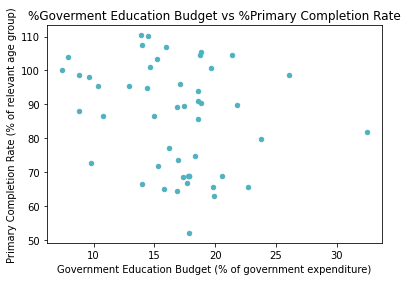

In [72]:
import matplotlib.pyplot as plt 
ax = complete__interest_data.plot.scatter(x = GOV_ED_BUDGET, y = PRI_ED_RATE, c = "#50B2C0", title = "%Goverment Education Budget vs %Primary Completion Rate")
ax.set_ylabel("Primary Completion Rate (% of relevant age group)")
ax.set_xlabel("Government Education Budget (% of government expenditure)")

# Part 6: Finding the Correlation
## Step 6.0: Using the corr method to find the correlation coefficient between two Series (or columns) of a DataFrame.
The correlation coefficient is between -1 (negative association) and 1 (positive association) with 0 having no association. The closer the number is to either -1 or 1, the stronger the data is to its respective association. 

In [73]:
cc = complete__interest_data[PRI_ED_RATE].corr(complete__interest_data[GOV_ED_BUDGET], method = 'pearson')
print(f"Correlation coefficient: {cc}")

Correlation coefficient: -0.2480200813002226


# Part 7: Explanations and Conclusions
In this analysis, I observed a countries' government education expenditures to its primary education completion rate by producing a scatterplot and calculating its correlation. The correlation coefficient for this data is -.25 (rounded to the nearest hundredth). This means there is a weak negative (inverse) relationship between a countries' education budget and its primary education success rate.

Therefore, I can reject my initial hypothesis and conclude there is not a weak positive relationship in the observed data, but a weak negative relationship.

# Part 8: Linear Regression
## Step 8.1: Converting the Series that was previously str into numbers
to_numeric method will convert the numbers into either int or floats: it will automatically convert to whatever is best.

This is needed to evaluate the linear equation of the data set.

In [74]:
x = pd.to_numeric(complete__interest_data[GOV_ED_BUDGET])
y = pd.to_numeric(complete__interest_data[PRI_ED_RATE])

## Step 8.2: Making the linear equation to display on the graph
- np.polyfit method is used to find the slope (m) and y-intercept (b) of the dataset.
- np.poly1d method is used to create a linear equation with the m and b previously found.

In [81]:
import numpy as np
m_and_b = np.polyfit(x, y, 1)
linear_equation = np.poly1d(m_and_b)
print(f"Linear equation: {linear_equation}")

Linear equation:  
-0.8261 x + 99.65


## Step 8.3: Graphing the linear equation (or line of best fit)
- np.linspace is used as the inputs for the linear equation.
    - This is because y is a function of x.
- np.polyval is used to find the y-value corresponding to the x-value
    - This is the equivalent of finding f(x) when x = (some number)


Text(0.5, 1.0, 'Line of best fit: Government Education Budget vs Primary Completion Rate')

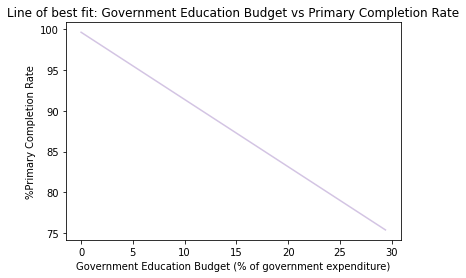

In [328]:
x_points = np.linspace(0, 30, num = 49, endpoint=False)
y_points = np.polyval(linear_equation, x_points)
plt.plot(x_points, y_points, c = "#D3C4E3")

plt.ylabel("%Primary Completion Rate")
plt.xlabel("Government Education Budget (% of government expenditure)")
plt.title("Line of best fit: Government Education Budget vs Primary Completion Rate")

## Step 8.4: Combining the scatterplot and line of best fit
Putting the scatterplot (as demonstrated in Part 5) and the line of best fit together to produce a linear regression visual!

(p.s it's a cute graph, right?)

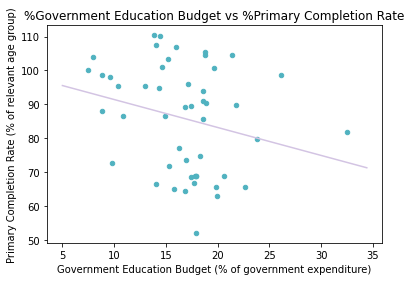

In [331]:
complete__interest_data.plot.scatter(x = GOV_ED_BUDGET, y = PRI_ED_RATE, c = "#50B2C0")

x_points = np.linspace(5, 35, num = 50, endpoint=False)
y_points = np.polyval(linear_equation, x_points)
plt.plot(x_points, y_points, c = "#D3C4E3")

plt.title("%Government Education Budget vs %Primary Completion Rate")
plt.ylabel("Primary Completion Rate (% of relevant age group)")
plt.xlabel("Government Education Budget (% of government expenditure)")
plt.show()